# Customer Segmentation

Exploratory Data Analysis


In [68]:
#importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


In [11]:
#importing datasets

df = pd.read_csv("C:/Users/admin/Desktop/Portfolio projects/Project_marketing/dataset/customer_segmentation_data.csv", index_col= 'id')
df.head(10)


,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount
id,,,,,,,,
1,38,Female,99342,90,3,24,Groceries,113.53
2,21,Female,78852,60,2,42,Sports,41.93
3,60,Female,126573,30,2,28,Clothing,424.36
4,40,Other,47099,74,9,5,Home & Garden,991.93
5,65,Female,140621,21,3,25,Electronics,347.08
6,31,Other,57305,24,3,30,Home & Garden,86.85
7,19,Other,54319,68,5,43,Clothing,191.72
8,43,Male,108115,94,9,27,Groceries,734.56
9,53,Male,34424,29,6,7,Sports,951.71


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 1 to 1000
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   1000 non-null   int64  
 1   gender                1000 non-null   object 
 2   income                1000 non-null   int64  
 3   spending_score        1000 non-null   int64  
 4   membership_years      1000 non-null   int64  
 5   purchase_frequency    1000 non-null   int64  
 6   preferred_category    1000 non-null   object 
 7   last_purchase_amount  1000 non-null   float64
dtypes: float64(1), int64(5), object(2)
memory usage: 70.3+ KB


In [15]:
df.describe()

,age,income,spending_score,membership_years,purchase_frequency,last_purchase_amount
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,43.783000,88500.800000,50.685000,5.46900,26.596000,492.348670
std,15.042213,34230.771122,28.955175,2.85573,14.243654,295.744253
min,18.000000,30004.000000,1.000000,1.00000,1.000000,10.400000
25%,30.000000,57911.750000,26.000000,3.00000,15.000000,218.762500
50%,45.000000,87845.500000,50.000000,5.00000,27.000000,491.595000
75%,57.000000,116110.250000,76.000000,8.00000,39.000000,747.170000
max,69.000000,149973.000000,100.000000,10.00000,50.000000,999.740000


Observations :

1. No missing values are observed

In [16]:
df.dtypes

age                       int64
gender                   object
income                    int64
spending_score            int64
membership_years          int64
purchase_frequency        int64
preferred_category       object
last_purchase_amount    float64
dtype: object

In [27]:
df.nunique()

age                      52
gender                    3
income                  996
spending_score          100
membership_years         10
purchase_frequency       50
preferred_category        5
last_purchase_amount    994
dtype: int64

In [29]:
#check for duplicates

df.duplicated().sum()

0

Observation:
No duplicates are found in the data

## Visualiations 

Text(0, 0.5, 'Spending score')

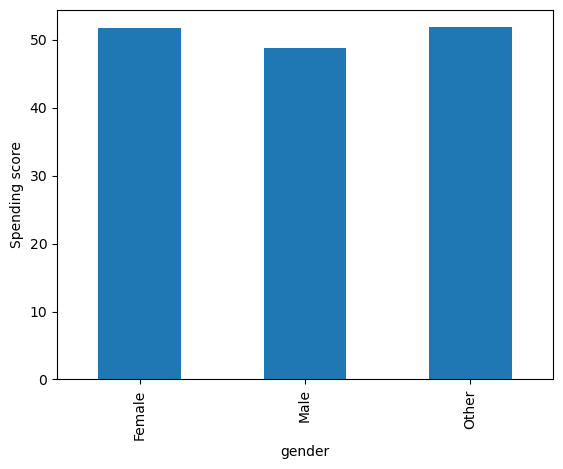

In [41]:
#gender vs spending score
df.groupby('gender')['spending_score'].mean().plot(kind='bar')
plt.ylabel('Spending score')

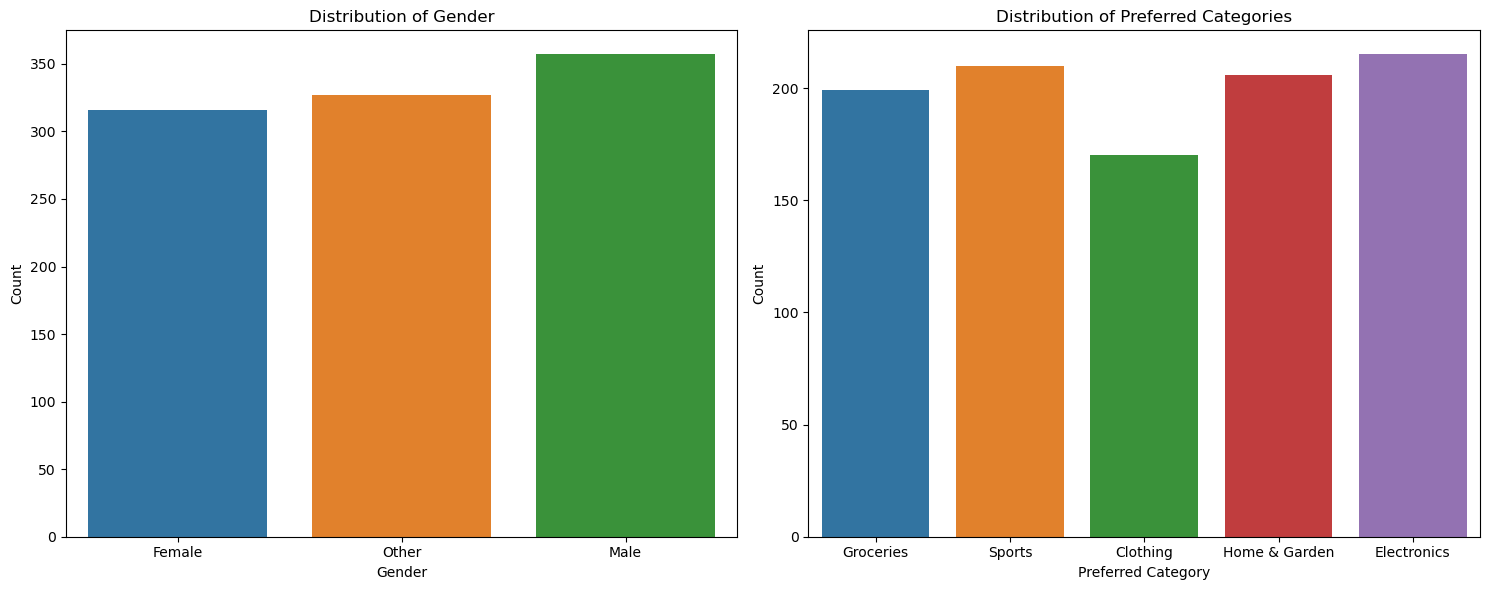

In [52]:
#Distribution of gender and preferred catoegory

cat_features = ['gender','preferred_catorgory']

#plotting
fig, ax = plt.subplots(1, 2,figsize=(15,6))

sns.countplot(x='gender', data=df, ax=ax[0], hue='gender')
ax[0].set_title('Distribution of Gender')
ax[0].set_xlabel('Gender')
ax[0].set_ylabel('Count')


sns.countplot(data=df,x='preferred_category',ax=ax[1],hue='preferred_category')
ax[1].set_title('Distribution of Preferred Categories')
ax[1].set_xlabel('Preferred Category')
ax[1].set_ylabel('Count')

plt.tight_layout()
plt.show()


Observations:

1. Distribution of Gender is more or less similar with Male having the most count in data
2. In preferred categories, clothing seems to be less favoured while electronics and sports are the most preferred


## Correlation Analysis

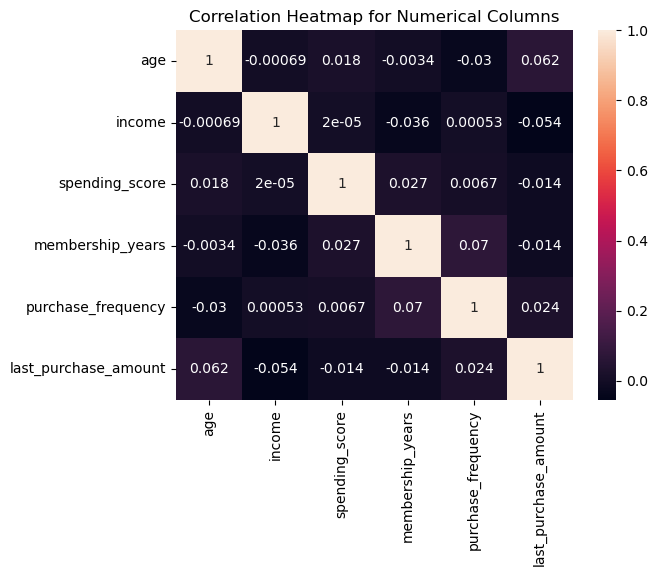

In [ ]:


corr = df.select_dtypes('number').corr()

sns.heatmap(corr,annot=True)
plt.title('Correlation Heatmap for Numerical Columns')
plt.show()

## Data Preprocessing

This encompasses data cleaning and tranformations such as normalizations, scslaing , categorical variable encoding , and feature engineering. This makes the data ready for analytical insights and model building.

Scaling of Numerical values

In this data, the values have different scales. For building the model , scaled features helps to coverage faster and prevents featured with large scales from dominating smaller scales.

When to scale :

1. Scale features when using algorithms relying on distance calculations or gradient descent
2. When there are columns with binry data does not require scaling , since they are already scaled  

In [81]:


col_data = df[num_features]

#scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(col_data)

scaled_df = pd.DataFrame(scaled_data, columns=num_features)

scaled_df.index = df.index

#replace original columns 

df[num_features] = scaled_df

df.head()


,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount
id,,,,,,,,
1,-0.384644,Female,0.316868,1.358468,-0.865010,-0.182348,Groceries,-1.281540
2,-1.515362,Female,-0.282016,0.321865,-1.215358,1.082005,Sports,-1.523763
3,1.078639,Female,1.112778,-0.714738,-1.215358,0.098620,Clothing,-0.230005
4,-0.251618,Other,-1.210096,0.805613,1.237080,-1.516943,Home & Garden,1.690080
5,1.411203,Female,1.523374,-1.025718,-0.865010,-0.112106,Electronics,-0.491443


In [82]:
#categorical encoding 

df = pd.get_dummies(df, columns=['gender','preferred_category'], drop_first=True)

df

,age,income,spending_score,membership_years,purchase_frequency,last_purchase_amount,gender_Male,gender_Other,preferred_category_Electronics,preferred_category_Groceries,preferred_category_Home & Garden,preferred_category_Sports
id,,,,,,,,,,,,
1,-0.384644,0.316868,1.358468,-0.865010,-0.182348,-1.281540,False,False,False,True,False,False
2,-1.515362,-0.282016,0.321865,-1.215358,1.082005,-1.523763,False,False,False,False,False,True
3,1.078639,1.112778,-0.714738,-1.215358,0.098620,-0.230005,False,False,False,False,False,False
4,-0.251618,-1.210096,0.805613,1.237080,-1.516943,1.690080,False,True,False,False,True,False
5,1.411203,1.523374,-1.025718,-0.865010,-0.112106,-0.491443,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
996,0.879100,0.691806,0.218205,0.186035,-1.797910,-0.604570,True,False,False,False,False,False
997,-1.382336,-0.677034,0.874720,1.587428,-0.252590,0.475247,False,True,False,True,False,False
998,-1.382336,0.718900,-0.369203,-0.164313,1.082005,-1.411583,True,False,False,False,False,True


In [83]:
num_features


['age',
 'income',
 'spending_score',
 'membership_years',
 'purchase_frequency',
 'last_purchase_amount']